# 8주차 과제 공지사항

----

1. 아래의 과제를 보고 답안을 작성하시면 됩니다.
2. 과제에 대한 점수는 100점 만점으로 진행이 됩니다. (한 문제당 20점)
3. 과제에 대한 평가는 모든 수강생들의 평가가 완료되면 확인할 수 있습니다. 참고부탁드립니다.
4. 과제기한은 일요일 저녁 10시 까지 입니다. 10시 이후에는 이 불가하오니 이 점 참고부탁드립니다.





# 문제1. RNN
- 난이도 : 하
- 관련 개념 : 직접 RNN 연산을 해본다.
- 코드를 통해 풀어주세요.

아래 그림의 RNN처럼 $h_{t-1}$과 $x_t$값을 넣어서 $y_t$값을 구하고자 한다. 주어진 코드를 이용하여 $y_t$의 값을 구하라.

- 그림 : https://miro.medium.com/max/2000/1*QFOzE0TEMFERg3G5_5HiPA.png

- activation function으로 tanh를 사용해주세요.
- $h_{t-1}$의 size는 6입니다.
- $x_t$의 size는 4입니다. 이 때, 4번 반복연산이 아니라 한번에 넣으면 됩니다.
- $y_t$의 size는 6입니다. 따라서 최종 결과는 size 6의 vector가 나오면 됩니다.
- 힌트 : tanh($W_h h_{t-1}+W_x x_t$)을 구하면 됩니다.




In [2]:
import numpy as np

h_t_1 = np.array([0.1, -0.2, 0.1, -0.4, 0.7, 0.8])
x_t = np.array([0.5, 0.2, 0.4, -0.5])

np.random.seed(0)
W_h = np.random.randn(6,6)
W_x = np.random.randn(6,4)

# 여기에 코드로 작성

np.tanh(np.dot(W_h, h_t_1) + np.dot(W_x, x_t))


array([ 0.5883904 , -0.84862191, -0.36953994, -0.93595463,  0.97208067,
        0.49777033])


# 문제2. Input Normalize
- 난이도 : 하
- 관련 개념 : RNN의 input을 normalize하지 않았을 때 생기는 문제점
- 각 10점
- 코드를 통해 풀어주세요.

심층이는 RNN 모델링을 하려고 한다. 그런데 실수로 input data를 그대로 넣었더니 모델의 학습이 잘 되지 않았다. 이를 확인해보기 위해 input data에 큰 값을 넣어보려고 한다. `input_data`가 tanh를 지난 결과가 아래와 같았다. 심층이는 이를 해결하기 위해 `input_data`의 최대값으로 각 원소를 나누어서 normalize하려고 한다. 이를 진행하고 tanh에 넣은 결과를 보여라.

In [3]:
import numpy as np

input_data = np.array([10, 5, 3, 5, 7, 10])
result = np.tanh(input_data)
print(result)

# 여기에 코드로 작성
input_data = input_data / input_data.max()
print(np.tanh(input_data))

[1.         0.9999092  0.99505475 0.9999092  0.99999834 1.        ]
[0.76159416 0.46211716 0.29131261 0.46211716 0.60436778 0.76159416]



# 문제3. Input Normalize
- 난이도 : 하
- 관련 개념 : RNN의 input을 normalize하지 않았을 때 생기는 문제점

위의 2번에서 RNN 모델링을 진행할 떄, normalize하지 않고 그대로 모델링을 진행하면 생기는 문제점에 대해 자유롭게 논하시오.


- 활성화 함수인 tanh의 양 끝단이 saturate되는 문제로 인해 gradient killing 문제가 발생할 수 있다.


# 문제4. RNN 연산
- 난이도 : 하
- 관련 개념 : 1-D에서 RNN연산을 연습해본다.
- 코드를 통해 풀어주세요.

심층이는 단변량 시계열 데이터를 통해 RNN 모델링을 하고 있다. 아래의 주어진 data와 weight를 이용하여 1번 forward-propagation을 진행한 결과를 보여라.

- RNN의 파라미터 공유를 이용하세요.
- 첫 hidden state $h_0$은 모두 0의 값을 갖습니다. 또한 hidden state의 size는 6입니다.
- 1-D input data가 sequentially 10개 있고 결과 $y_t$도 크기 6의 vector가 sequentially 10개가 나오게 하면 됩니다. 매 시점마다 $y_t$를 `print`하셔도 됩니다.
- $y_t = tanh(W_h h_{t-1}+ W_x x_t)$



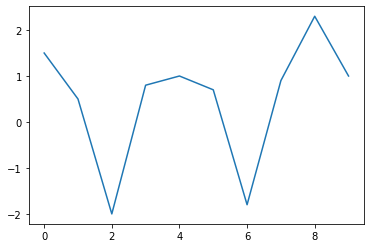

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 단변량 데이터
data = np.array([1.5, 0.5, -2.0, 0.8, 1.0, 0.7, -1.8, 0.9, 2.3, 1.0])
plt.plot(data)

In [5]:
# 주어진 weight
h_0 = np.zeros((6,)) # 첫 시점 hidden state

np.random.seed(0)
W_h = np.random.randn(6,6)
W_x = np.random.randn(6,) # x값 하나가 W_x에 곱하면 브로드캐스팅되면서 크기 6의 벡터가 되면 됩니다

In [9]:
# 여기에 작성하시면 됩니다
h = h_0
for idx, x in enumerate(data, 1):
  print(f'y{idx}: {np.tanh(np.dot(W_h, h) + np.dot(W_x, x))}')
  h = np.dot(W_h, h)

y1: [ 0.95131425  0.94717445 -0.52338477 -0.42473416 -0.91747466 -0.9721502 ]
y2: [ 0.54773889  0.53789575 -0.19127804 -0.15001069 -0.48099386 -0.61068246]
y3: [-0.98552424 -0.98382828  0.64962732  0.54031863  0.97028296  0.9931966 ]
y4: [ 0.75489231  0.74512489 -0.30031105 -0.23723503 -0.68519542 -0.81306764]
y5: [ 0.84266362  0.83437907 -0.36905342 -0.29341853 -0.78124314 -0.88960267]
y6: [ 0.69687721  0.68669042 -0.26467485 -0.20850886 -0.62549854 -0.75906809]
y7: [-0.97642939 -0.97397039  0.60258003  0.49611912  0.95514527  0.98802487]
y8: [ 0.80309228  0.79399203 -0.33512816 -0.26555222 -0.73691653 -0.85595545]
y9: [ 0.99305455  0.99210681 -0.71181414 -0.60137368 -0.98404853 -0.99709229]
y10: [ 0.84266362  0.83437907 -0.36905342 -0.29341853 -0.78124314 -0.88960267]



# 문제5. LSTM
- 난이도 : 하
- 관련 개념 : LSTM에서 gate들의 역할

그림을 참고하여 LSTM에서 아래의 gate들의 역할이 무엇인지 적으시오. 단, activation function을 설명에 포함하여서 적어주세요.

![이미지](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=http%3A%2F%2Fcfile28.uf.tistory.com%2Fimage%2F22023B4F592AE8B6173AE9)

- Forget gate
- Input gate
- Output gate





- 여기에 작성하세요 (더블클릭)